# Data Analysis Script
##### Hasso-Plattner Institute - HPI | University of Potsdam, Germany
##### Work completed by Alisher Turubayev (Fabian Stolp, PhD supervisor)

This notebook contains all code that was used to generate figures/tables for the thesis submission. Original data is available in the `replication_data` folder,

## Data exploration

### Task 1
Task: calculate mean/std time per task to present in the paper

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [13]:
PARTICIPANTS = ['S01', 'S03', 'S04', 'S05', 'S07', 'S08', 'S09', 'S10', 'S11', 
    'S12', 'S13', 'S14', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 
    'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30']
# File associations
FILE_SUFFIXES = {
    'task1': 'R01_an_ev.txt', 
    'task2': 'R02_an_ev.txt', 
    'task3': 'R03_an_ev.txt'
}
FILES_PATH = './replication_data/event_data'

In [18]:
task1_durations = []
task2_durations = []
task3_durations = []

# Load events, extract latency for end of task and beginning of task, and note the difference
for participant_name in PARTICIPANTS:
    task1_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task1']))
    task2_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task2']))
    task3_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task3']))
    
    if os.path.isfile(task1_path) == False or os.path.isfile(task2_path) == False or os.path.isfile(task3_path) == False:
        print(f'  A file for participant {participant_name} was not found. Continuing...')
        continue
    df = pd.read_table(task1_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task1_durations.append(time_end - time_start)
    
    df = pd.read_table(task2_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task2_durations.append(time_end - time_start)

    df = pd.read_table(task3_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task3_durations.append(time_end - time_start)

  A file for participant S09 was not found. Continuing...
  A file for participant S10 was not found. Continuing...
  A file for participant S11 was not found. Continuing...
  A file for participant S12 was not found. Continuing...
  A file for participant S13 was not found. Continuing...
  A file for participant S14 was not found. Continuing...


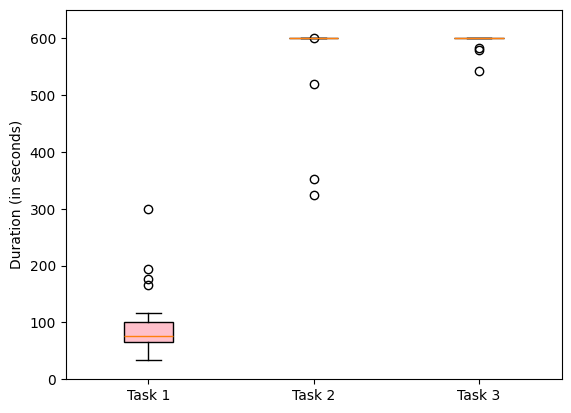

In [79]:
bplot = plt.boxplot([task1_durations, task2_durations, task3_durations], vert = True, patch_artist = True, labels = ['Task 1', 'Task 2', 'Task 3'])
plt.ylim(0, 650)
plt.ylabel('Duration (in seconds)')
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [58]:
# Transform data to dataframe for .describe() summary
df = pd.DataFrame.from_dict({
    'Task 1': task1_durations, 
    'Task 2': task2_durations,
    'Task 3': task3_durations
})

In [59]:
df

,Task 1,Task 2,Task 3
0,166.363,600.051,600.086
1,66.454,600.098,600.090
2,194.447,600.103,600.099
3,33.905,519.548,583.018
4,117.304,600.103,600.102
5,64.650,600.103,600.055
6,177.047,600.099,600.103
7,75.502,600.115,600.071
8,71.747,600.116,600.091
9,93.824,600.116,600.119


In [60]:
df.describe(percentiles = [])

,Task 1,Task 2,Task 3
count,21.000000,21.000000,21.000000
mean,98.884571,571.292238,595.514524
std,62.881100,79.690108,13.542326
min,33.905000,323.820000,541.921000
50%,75.502000,600.103000,600.086000
max,300.071000,600.119000,600.119000


In [67]:
df.median(axis = 0)

Task 1     75.502
Task 2    600.103
Task 3    600.086
dtype: float64

### Task 2

Generate NASA-TLX boxplot like in Medeiros et al. (2021)

In [74]:
# Values from BASE_Study0 - Evaluation_NASA_TLX / Effort felt / Mental Effort column (G, AK, BO)
tlx_task1 = [2,1,2,2,1,2,4,2,1,2,2,2,2,2,2,1,1,2,2,3,2,2,1,2,1,2,1,1,2]
tlx_task2 = [5,5,4,6,3,5,5,3,6,4,5,4,6,5,4,3,3,6,5,4,4,6,4,6,4,4,6,5,5]
tlx_task3 = [5,5,3,5,4,6,4,3,5,5,5,6,6,6,5,4,4,6,4,6,5,5,4,6,3,5,6,3,6]

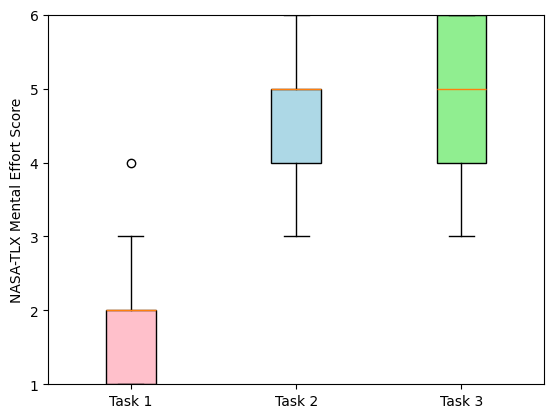

In [80]:
bplot = plt.boxplot([tlx_task1, tlx_task2, tlx_task3], vert = True, patch_artist = True, labels = ['Task 1', 'Task 2', 'Task 3'])
plt.ylim(1, 6)
plt.ylabel('NASA-TLX Mental Effort Score')
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)